# Computer Vision and CNN

## Overview CV

### Usage
Bài toán CV là bài toán detecting patterns in visual data:
- Classify picture thuộc object gì (classification)
- Detect xem có đối tượng X trong hình ảnh hay không? Nó ở vị trí nào trong bức ảnh ? 
...

### Inputs and outputs 

1. Input: image được encode ra numeric with shape [batch, height, width, channels]
2. Output: xác suất dự đoán các class tương ứng
- Binary: output_shape = [1] hoặc scalar
- Multiclass: output_shape = [n_class]

## Overview CNN

(https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks#ct-architectures)

__CNN__ là một mạng neural nets chứa 1 số lớp layer đặc biệt , tên gọi là __Convolutional layer + Pooling layer__, các layer này có khả năng trích lọc ra các đặc trưng quan trọng của bức ảnh, thay vì sử dụng toàn bộ feature (chứa nhiều feature dư thùa gây nhiễu như mạng neural thông thường), từ đó mặc dù số lượng parameters ít hơn nhưng nó hỗ trợ tốt trong việc học image data. 

![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/architecture-cnn-en.jpeg?3b7fccd728e29dc619e1bd8022bf71cf)

__Feature__ chính là bất kỳ chi tiết gì được thể hiện trong bức ảnh, có ý nghĩa trong việc nhận điện object và classify ảnh. Feature không được định nghĩa bởi con người viết code, mà có thể là bất kỳ chi tiết nào mà model có thể nhìn và học được từ input images, và tự động nhận diện nó, và áp dụng vào các bộ filter khác nhau cho input image.

> Ví dụ: Để phân loại được ảnh con người, 1 feature có thể là nhận dạng được đầu người, hoặc cánh tay con người.

CNN được sử dụng phổ biến trong computer vision: image processing, classification, segmentation, and object detection. [Chi tiết CNN's Application](http://ijcsit.com/docs/Volume%207/vol7issue5/ijcsit20160705014.pdf)

Mặc dù nếu dùng mạng MLP thông thường với số lượng nodes và layers lớn có thể mang lại hiệu quả trong việc classification nhưng đổi lại, chúng có số lượng parameters lớn hơn rất nhiều so với CNN.

Để hiểu rõ CNN một cách đơn giản (thông qua kiến trúc nets TinyVGG), đọc chi tiết tại: [CNN explainer website](https://poloclub.github.io/cnn-explainer/). Hiện nay, cấu trúc mạng CNN hiện đại so với tinyVGG có vài điểm tương đồng về cách sắp xếp layers và operation, nhưng larger scale hơn so với tinyVGG.

### Types of layer

![](_images/cnn_architecture.png)

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*Một ví dụ đơn giản để stack các layer trên vào mạng CNN, trên thực tế, có thể chúng sẽ được sắp xếp lại theo nhiều kiểu khác nhau*

#### Input layer

Input image(s) được sử dụng cho việc học có thể là photo hoặc video (list of photos).

Các input image(s) sau khi được preprocessing trước khi đưa vào input layer. Các preprocessing task bao gồm: encoding dưới dạng numeric, chuẩn hoá về cùng 1 kích thước ảnh, normalize (`/255`) và Flatten. Chúng sẽ được sử dụng cho các layer tiếp theo.
> `input_shape = [batch_size, height, width, channels]`

#### Convolutional layer

(https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

```python
tf.keras.layers.ConvXD # where X can be multiple values
```

__Convolutional Layer__ là 1 lớp layers (đặc trưng của CNN) sử dụng các bộ filter , mỗi neurons/node trong CL có output là 1 matrix (thay vì là 1 scalar thông thường), mục đích là lấy ra các đặc trưng quan trọng của input image hoặc output từ các layer trước đó. Mỗi neurons/node chứa __kernel weights__ và __bias__, phục vụ các công việc như chọn ra feature tốt nhất từ 1 nhóm các features.

>![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67)

- __Kernel weights__: là 1 vector chứa các weight, kết hợp với bộ features từ layer trước, sử dụng phép dot_product đó để tạo ra feature mới giúp phân biệt các hình ảnh với nhau
- __bias__: mỗi node chứa 1 bias trong phép biến đổi linear tạo ra 1 feature mới.
> Ví dụ với first convolutional layer in TinyVGG bao gồm 10 neurons được tạo bởi 3 neurons từ input_layer, sử dụng kiến trúc full-connected, tức là mỗi neuron được kết nối tới mọi neuron từ layer trước đó. Kernel weights là vector có size = 9, tức lấy 9 điểm ảnh từ input neuron để tạo ra một điểm ảnh cho output convolutional layer. 

>![](https://poloclub.github.io/cnn-explainer/assets/figures/convlayer_detailedview_demo.gif)

`Conv2D` thể hiện rằng inputs gồm 2 dimensional (height and width), mặc dù input đầu vào có shape là (height, width, color_channels), tuy nhiên convolutional layers sẽ xử lý từng color channel một cách độc lập và riêng biệt.

##### Filter hyperparameters

![](_images/cl_hyper_params.png)

1. __filter__: Số lượng bộ filter (feature_extrator) sẽ được pass over qua 1 input image. Filter càng lớn thì model càng complexity, model càng có khả năng bắt nhiều được các feature có thể mang lại hiệu quả trong việc phân loại, đương nhiên cũng có khả năng bắt các feature dư thừa.
> Common value: 10, 32, 64, 128
![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/dimensions-filter-en.png?7ce161e129a392a1804a231536b59f45)

2. __Padding__ (`valid`/`same`): thường được sử dụng khi muốn output được mở rộng từ input (tức input_shape < output_shape). Nếu `padding = 'valid'` , tức ko mở rông. Nếu `padding = 'same'`, mở rộng input bằng x lớp giá trị 0 bên ngoài cho mỗi bên trên/dưới/trái/phải (input_shape từ $m.n$ thành $(m+2x).(n+2x)$). *(có nhiều phương pháp padding, nhưng phổ biến nhất là zero-padding do tính đơn giản, tính toán nhanh và hiệu quả đảm bảo)*

| Phương pháp | Valid  | Same    | Full   |
| --------- | ------ | ------ | ----- |
| Minh hoạ    | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/padding-valid-a.png?1f58d78612f6202ce201620919d71609) | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/padding-same-a.png?8b680283b10a6e131209b74e21a61213) | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/padding-full-a.png?b51e98467c8a77574c7e8f108654ad95) |
| Mục đích    | • Không sử dụng padding<br>• Bỏ phép tích chập cuối nếu số chiều không khớp | • Kích thước đầu ra thuận lợi về mặt toán học<br>• Còn được gọi là 'half' padding | • Padding tối đa sao cho các phép tích chập có thể được sử dụng tại các rìa của đầu vào<br>• Bộ lọc 'thấy' được đầu vào từ đầu đến cuối |

3. __Kernel size__: kích thước của bộ __filter__ chạy qua kernel tạo ra output. Giá trị __kernel size__ ảnh hưởng lớn đến khả năng phân loại ảnh. Nếu kernel size nhỏ: tức sẽ trích xuất được 1 lượng lớn information từ input feature, đồng thời  cũng giảm khả năng giảm chiều dữ liệu ( do số lượng feature output lớn hơn ), tạo ra mạng deeper và phức tạp hơn. Nếu kernel size lớn sẽ trích xuất ít thông tin hơn, dẫn đến giảm kích thước lớp nhiều hơn, thường dẫn đến hiệu suất kém hơn. Việc chọn kích thước hạt nhân phù hợp sẽ phụ thuộc vào nhiệm vụ và tập dữ liệu của bạn, nhưng nói chung, kích thước hạt nhân nhỏ hơn dẫn đến hiệu suất tốt hơn cho nhiệm vụ phân loại hình ảnh.
> Ví dụ: kernel size = 3 tức sử dụng 3x3 = 9 điểm ảnh để tạo ra 1 điểm ảnh ở output.
> Các giá trị thường là 3, 5, 7,..

4. __Stride__: Kích thước bước nhảy pixel qua mỗi lần tính. Stride tác động đến CNN tương tự như kernel_size, nếu stride nhỏ thì output càng chi tiết và higher dimension
> Ví dụ: stride = 1 tức sau mỗi lần tính toán, kernel window sẽ shift sang phải 1 pixel cho lần tính toán tiếp theo.
![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/stride.png?36b5b2e02f7e02c3c4075a9d836c048c)

#### Hidden Activation Function

Tạo ra các tính chất non-linearity cho output của convolutional layers, thường áp dụng hàm ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu))

Với hàm ReLU, tất cả các output của CL sẽ luôn lớn hơn hoặc bằng 0
![](_images/activation_func_cnn.png)

#### Pooling layer

Pooling layer là 1 lớp được sử dụng với mục đích giảm chiều dữ liệu (gộp 1 nhóm các pixel lại thành 1 theo 1 hàm nào đó), thường được đặt sau convolution layer. Việc giảm chiều dữ liệu giúp cho giảm được số lượng parameters khi triển khai, giảm thời gian tính toán mà vẫn giữ được phần lớn các feature quan trọng.

Có rất nhiều phương pháp pooling như Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)). 

| Kiểu | Max pooling  | Average pooling    | 
| --------- | ------ | ------ | 
| Chức năng   | Từng phép pooling chọn giá trị lớn nhất trong khu vực mà nó đang được áp dụng | Từng phép pooling tính trung bình các giá trị trong khu vực mà nó đang được áp dụng |
| Minh hoạ    | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/max-pooling-a.png?711b14799d07f9306864695e2713ae07) | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/average-pooling-a.png?58f9ab6d61248c3ec8d526ef65763d2f) |
| Nhận xét    | • Bảo toàn các đặc trưng đã phát hiện<br>• Được sử dụng thường xuyên | • Giảm kích thước feature map<br>• Được sử dụng trong mạng LeNet |


__Các hyperparameters__: `pool_size`, `stride`, `padding`

> Trong TinyVGG sử dụng Max-pooling với tham số `pool_size=2` (tương tự `kernel_size`) và `stride=1` (các tham số này có ý nghĩa tương tự convolutional layer), mỗi window 2x2 sẽ lấy ra giá trị `Max` là output, qua đó giảm đi 75% kích thước dữ liệu.

#### Flatten Layer (Fully Connected Dense)

Flatten Layer giúp convert 3-dimensional layer trong mạng CNN thành 1-dimensional vector để tạo thành full-connected input layer cho output layer. Trong mô hình mạng CNNs, các tầng kết nối đầy đủ thường được tìm thấy ở cuối mạng và được dùng để tối ưu hóa mục tiêu của mạng ví dụ như độ chính xác của lớp.

[`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/fully-connected-ltr.png?32caf9e07c79d652faa292812579d063)

#### Output Layer and activation

Sử dụng các pattern được học để cho ra kết quả dự đoán với output_shape = `[number_of_classes]` hoặc output là scalar với binary classification

 
__Output Activation Function__

- Đối với bài toán multi-class classification, thường áp dụng hàm softmax [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax), để chuẩn hoá các giá trị output về dạng probability ( giá trị thuộc khoảng [0,1] và có tổng các output bằng 1)
- Đối với bài toán binary classification, thường áp dụng hàm sigmoid [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid)

### Tunning hyperparameters

#### Cấu trúc convolution layer
Công thức tính output shape cho convolutional layer, ứng với mỗi chiều height/width, cách tính size:
```
output_size = (input_size - kernel_size + 2 * padding_size) / stride + 1
```
![](_images/cl_archi.png)

#### Model complexity
Độ phức tạp của model thường đo bằng số params của model, xét trong 1 tầng của CNN, mức độ phức tạp được tính toán như sau
![](_images/model_cnn_complexity.png)

### Ứng dụng CNN

#### Object detection

__1. Các loại nhận diện vật thể__

| Image Classification | Classification with localization  | Detection    | 
| --------- | ------ | ------ | 
| ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/object-detection-clas-en.jpeg?f380203d7e5d88936e654205473e86c2)   | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/object-detection-loc-en.jpeg?f8ec96e14fb13f2515f2c179cd326545) | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/object-detection-det-en.jpeg?f735de7d1c1bccd2ff1c864b587ad842) |
| Traditional CNN    | Simplified YOLO, R-CNN | YOLO, R-CNN |
| • Classifies a picture<br>• Predicts probability of object   | • Detects an object in a picture<br>• Predicts probability of object and where it is located | • Detects up to several objects in a picture<br>• Predicts probabilities of objects and where they are located |


__2. Phương pháp nhận diện vật thể__
| Bounding box detection | Landmark detection  | 
| --------- | ------ |
| ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/detection-bounding-box.jpeg?4fab94de8d967605519bfc6bafd14df3)   | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/detection-landmark.jpeg?ed85ca8d6c2673f35e8c266c5476690f) | 
| Phát hiện phần trong ảnh mà có sự xuất hiện của vật thể    | Phát hiện hình dạng và đặc điểm của một đối tượng bằng các điểm có tương quan với nhau |

#### Face verification and recognition
| Face verification | Face recognition  | 
| --------- | ------ |
| ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/face-verification-en.jpeg?9b6ea3c15805347193943fe09692f71b)   | ![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/face-recognition-en.jpeg?ed30504000897087c2549f4f964c9441) | 
| Is this the correct person? - One-to-one lookup    | Is this one of the K persons in the database? - One-to-many lookup |

## Extra-curriculum

1. **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.

2. **Watch:** Deep dive on [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use **batches** to train models, this technical overview covers many of the reasons why.

3. **Read:** [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing. 

4. **Read:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.

5. **Code practice:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.

## Build CNN binary

### Dataview

Folder datasets được chia thành `train` + `test`. Trong đó, trong folder `train`/`test` chứa các subfolder là tên `class`, trong subfolder là ảnh tương ứng với tên của subfolder. 

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```

In [9]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd

from tqdm.keras import TqdmCallback

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

print(tf.__version__)

2.12.0


In [8]:
data_folder = "Datasets/pizza_steak/"

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk(data_folder):
    print(f"{dirpath}: {len(dirnames)} directories + {len(filenames)} images")
    
# class_name
class_name = [i for i in os.listdir(os.path.join(data_folder, 'train')) 
              if os.path.isdir(os.path.join(data_folder, 'train', i))]
class_name

Datasets/pizza_steak/: 2 directories + 1 images
Datasets/pizza_steak/test: 2 directories + 1 images
Datasets/pizza_steak/test/steak: 0 directories + 250 images
Datasets/pizza_steak/test/pizza: 0 directories + 250 images
Datasets/pizza_steak/train: 2 directories + 0 images
Datasets/pizza_steak/train/steak: 0 directories + 750 images
Datasets/pizza_steak/train/pizza: 0 directories + 750 images


['steak', 'pizza']

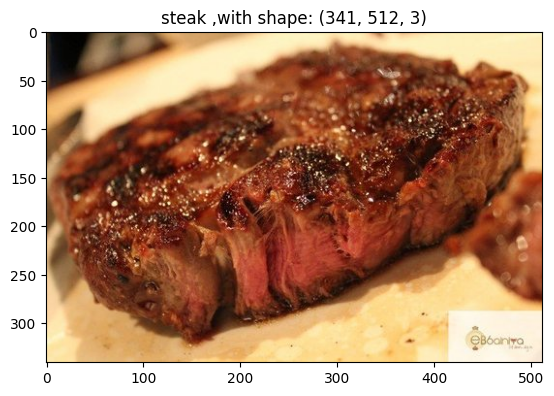

In [19]:
def view_random_image(tar_folder = 'Datasets/pizza_steak/train', tar_class = 'pizza'):
    folder = os.path.join(tar_folder, tar_class)
    rand_img = random.sample(os.listdir(folder),1)
    img = mpimg.imread(os.path.join(folder, rand_img[0]))
    plt.imshow(img)
    plt.title(tar_class + f" ,with shape: {img.shape}")
    return img

img = view_random_image(tar_class = 'steak')

 image shape = (Height, Width,  Colour Channels)

In [22]:
img.shape # return height, width,  color channels

(341, 512, 3)

### Thiết kế pipeline end-to-end model 

#### Load and preprocess images

Dữ liệu được chia vào `train` và `test` directories và phân tách vào subfolders in each class.

**Normalize the data**: Dữ liệu ảnh thì mỗi giá trị color channel sẽ biến thiên trong khoảng [0, 255]. Để model train nhanh hơn và tăng performance, normalize cần phải được thực hiện để đưa các giá trị về [0,1]

**Set the batch size**: Thay vì train toàn bộ các ảnh  cùng 1 lúc thì sẽ train theo batch. Thường lựa chọn batch_size = 32 vì nó thường hiệu quả trong nhiều TH khác nhau.

**class_mode**: cách label được return trong output
- "categorical" will be 2D one-hot encoded labels,
- "binary" will be 1D binary labels,
- "sparse" will be 1D integer labels,
- "input" will be images identical to input images (mainly used to work with autoencoders).

In [31]:
# data batch generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set random seed
tf.random.set_seed(1)

train_data = ImageDataGenerator(rescale = 1/255)\
                .flow_from_directory(
                    directory = data_folder + "/train", # data directory
                    batch_size = 32,                    # number of images to process at a time
                    target_size = (224,224),            # convert all images to be 224 x 224 
                                                        # (common size to balance the remain info and chi phí tính toán)
                    class_mode = 'binary',              # cách label được return trong output
                    )
test_data = ImageDataGenerator(rescale = 1/255)\
                .flow_from_directory(
                    directory = data_folder + "/test",
                    batch_size = 32,                    
                    target_size = (224,224),            
                    class_mode = 'binary',              
                    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#### Create CNN model
(Xem phần overview CNN)

In [32]:
# create CNN model (the same TinyVGG in https://poloclub.github.io/cnn-explainer/)
cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, # số lượng bộ trích xuất đặc trưng của ảnh (feature extrator) được tạo ra trên conv layer 
                                         # (hiểu đơn giản giống như số lượng nodes trên 1 layer của MLP)
                           kernel_size = 3, # (window shape). Can set specific shape like (4,3)
                           activation = 'relu',
                           input_shape = (224,224,3) # first layer specifies input shape (height, width, colour channels)
                          ),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, 'sigmoid'), # because binary classification
])

#### Compile model
- __Loss function__:
    - 'binary_crossentropy' for binary classification
    - 'categorical_crossentropy' for multi-class classification
- __Optimizer__: Adam (default)
- __Evaluation metric__: accuracy.

In [33]:
cnn_1.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy']
             )

#### Fit model
- `steps_per_epoch` - Số lượng batches mà model sẽ train qua mỗi epoch, sử dụng len(data_train) để đảm bảo mỗi epoch sẽ train qua toàn bộ dữ liệu
- `validation_steps` - tương tự nhưng với validation batch

In [60]:
from tqdm.keras import TqdmCallback
# from livelossplot import PlotLossesKerasTF

history = cnn_1.fit(train_data, epochs = 10, verbose = 0, callbacks=[TqdmCallback()],
         steps_per_epoch=len(train_data), # number of batches in traindata
          validation_data=test_data, validation_steps=len(test_data)
         )

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [30]:
cnn_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 3)       84        
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

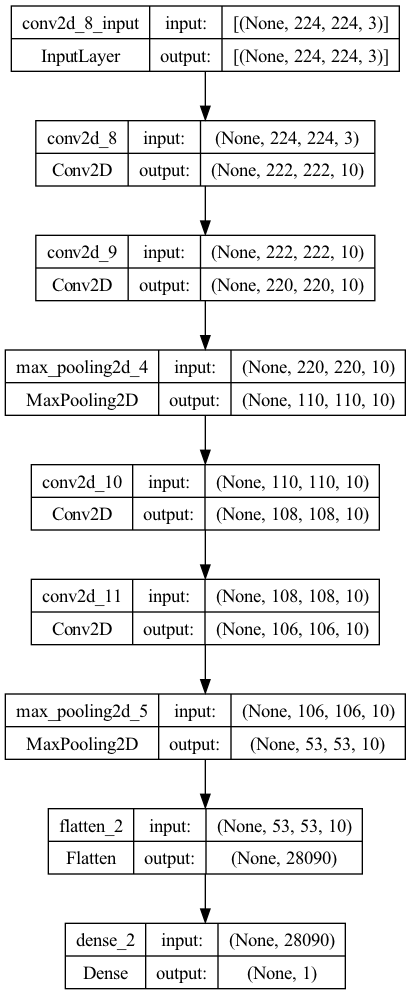

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(cnn_1, show_shapes=True)

#### Evaluate model

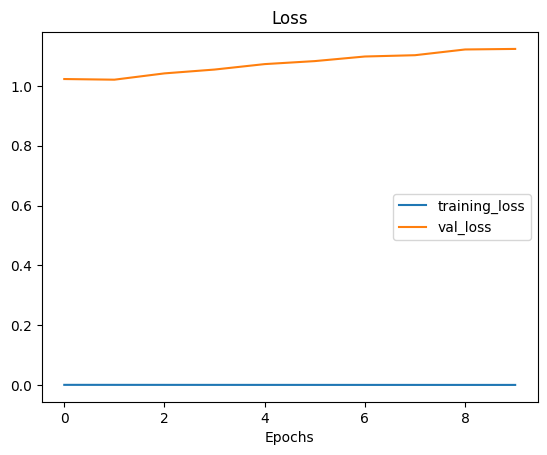

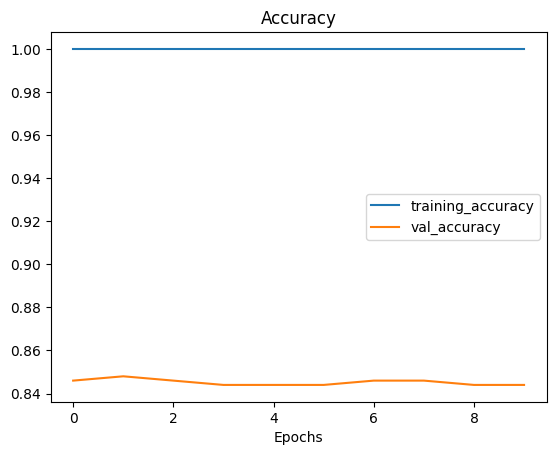

In [ ]:
import pandas as pd
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    
plot_loss_curves(history)

#### Improving model

Có một vài cách để cải thiện thêm model:
- Tăng số lượng convolutional layer
- Tăng số lượng filter tại mỗi conv layer
- Add thêm Dense layer sau lớp Flatten()
...

Tuy nhiên model đang bị overfitting nên ta sẽ ko cần thực hiện bước improving model.


#### Tunning hyperparameters
Có vẻ như model trên đang bị overfit (the validation loss có xu hướng tăng ở các epochs cuối) với kết quả model là:
```
loss=0.00018, accuracy=1, val_loss=1.12, val_accuracy=0.844
```
Có một vài phương pháp giảm overfitting như sau:
- Thay đổi cấu trúc mạng:
    - Giảm Conv layers hoặc số filter của Conv layers
    - Bổ sung thêm MaxPooling layer phía sau Conv layers nếu chưa có
- Data processing:
    - Sử dụng kỹ thuật image data augmentation: xoay ảnh, zoom-in, zoom-out, shift ảnh, flip ảnh,...

Ngoài ra các phương pháp tìm kiếm idea model:
- Thay đổi thứ tự mạng CNN, số lượng layer/filter
- Tăng số epochs train
- Finding ân ideal learning rate
- Get more data to train
- Use transfer learning model: tận dụng lại các model đã được train và điều chỉnh sau cho phục vụ mục đích bài toán

In [63]:
import os
from datetime import datetime
import pickle
import pandas as pd
from munch import DefaultMunch
from random import choice

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tqdm.keras import TqdmCallback

import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model, img_to_array, load_img

from urllib.request import urlopen
from io import BytesIO

In [88]:
# thực hiện tunning giảm overfitting bằng bổ sung thêm maxpooling và data augmentation
CFG = {
   'seed':1 ,
   "data": {
       'dirs':{
            "path": "Datasets/pizza_steak/",
            'train_subfolder': 'train',
            'test_subfolder': 'test',
            'pred_subfolder': None,           
       },
       'aug_generator':{
            'rescale' : 1/255.,
             'rotation_range' : 20, 
             'shear_range' : 0.2, 
             'zoom_range' : 0.2, 
             'width_shift_range' : 0.1, 
             'height_shift_range': 0.1, 
             'horizontal_flip' : True
       },
       'non_aug_generator':{
            'rescale' : 1/255.,
       },
       'loader':{
           'aug_train' : True,
           'aug_test': False
       },
       'flow':{
           'batch_size' : 32,                   
           'target_size' : (224,224),            
           'class_mode' : 'binary',
       },
    },
    "model":{
        'build':{
            
        },
        'compile':{
            "optimizer": tf.keras.optimizers.legacy.Adam(),
            'loss':'binary_crossentropy',
            "metrics": ["accuracy"],
        },
        'fit':{
            'epochs' : 4,
            'verbose' : 0
        },
        'save':{
            'dirs' : 'models',
            'export_graph': True,
        }
    },
}



In [101]:
class CNN_Model:
    def __init__(self, config, pathmodel = None ):
        
        self.config = DefaultMunch.fromDict(config)
        tf.random.set_seed(self.config.seed)
        self.epochs = self.config.model.fit.epochs
        self.verbose = self.config.model.fit.verbose
        self.create_datagen()
        if pathmodel is not None:
            self.pathmodel = pathmodel
            self.load_model(pathmodel)
        else:
            self.load_datafolder()
            self.load_data()

    def load_datafolder(self, view = False):
        data_cfg = self.config.data.dirs
        data_folder = data_cfg.path
        self.train_folder = os.path.join(data_folder, data_cfg.train_subfolder)
        self.test_folder = os.path.join(data_folder, data_cfg.test_subfolder)
        self.class_list = [i for i in os.listdir(self.train_folder) if (i[0] != ".") 
                           and os.path.isdir(os.path.join(self.train_folder, i))]
        if view:
            for dirpath, dirnames, filenames in os.walk(data_folder):
                print(f"{dirpath}: {len(dirnames)} directories + {len(filenames)} images")
        
    def create_datagen(self):
        load_cfg = self.config.data
        self.aug_datagen = ImageDataGenerator(**load_cfg.aug_generator)
        self.nonaug_datagen = ImageDataGenerator(**load_cfg.non_aug_generator)
    
    def load_data(self):
        """Loads and Preprocess data """
        load_cfg = self.config.data
        self.train_gen = self.aug_datagen if load_cfg.loader.aug_train else self.nonaug_datagen
        self.test_gen = self.aug_datagen if load_cfg.loader.aug_test else self.nonaug_datagen
        print("train: ", end = "")
        self.train_data = self.train_gen.flow_from_directory(self.train_folder,**load_cfg.flow, shuffle = True)
        print("test: ", end = "")
        self.test_data = self.test_gen.flow_from_directory(self.test_folder,**load_cfg.flow, shuffle = False)
        self.train_len = len(self.train_data)
        self.test_len = len(self.test_data)
        self.class_indices = {v: k for k, v in self.train_data.class_indices.items()}
    
    def load_pred_data(self, pred_dir = None):
        self.pred_dir = self.config.data.dirs.pred_subfolder if pred_dir is None else pred_dir
        if os.path.isdir(self.pred_dir):
            filenames = [i for i in os.listdir(pred_dir) if i[0] != "."]
        elif os.path.isfile(pred_dir):
            filenames = [os.path.basename(pred_dir)]
            self.pred_dir = self.pred_dir[:-len(filenames[0])-1]
        else:
            print('No pred_dir !')
            raise
        flow = {k:v for k,v in self.config.data.flow.items() if k != 'class_mode'}
        df = pd.DataFrame(filenames, columns = ['filename'])
        pred_data = self.nonaug_datagen.flow_from_dataframe(df, directory = self.pred_dir,
                                                shuffle = False, y_col=None, 
                                                class_mode=None, **flow)
        return df, pred_data
            
    def preview_image_generator(self, dataset = 'train', n_aug = 1):
        gen = self.test_gen if dataset == 'test' else self.train_gen
        fol = self.test_folder if dataset == 'test' else self.train_folder
        class_name = choice([i for i  in os.listdir(fol) if i in self.class_list])
        ran_img = choice(os.listdir(os.path.join(fol, class_name)))
        df = pd.DataFrame({"filename":ran_img,"class":class_name}, index = [0])
        flow = {k:v for k,v in self.config.data.flow.items() if k != 'class_mode'}
        data = gen.flow_from_dataframe(df, directory = os.path.join(fol, class_name), **flow)
        imgs = [data.next()[0].squeeze() for i in range(n_aug)]
        self._view(imgs)

    def _view(self, imgs, subtitles = None):
        num = len(imgs)
        rows = (num+3)//4
        cols = 4 if (rows > 1) else min(4, num)
        # plt.figure(figsize=(4*rows, 4*cols))
        plt.figure()
        for i in range(num):
            plt.subplot(rows, cols, i+1)
            plt.imshow(imgs[i])
            plt.yticks([])
            plt.xticks([])
            if subtitles is not None:
                plt.title(subtitles[i])

    def build(self):
        self.model = tf.keras.Sequential()
        self.model.add(Conv2D(10, 3, activation = 'relu',input_shape = (224,224,3)))
        self.model.add(Conv2D(10, 3, activation = 'relu'))
        self.model.add(MaxPool2D(pool_size = (2,2)))
        self.model.add(Conv2D(10, 3, activation = 'relu'))
        self.model.add(Conv2D(10, 3, activation = 'relu'))
        self.model.add(MaxPool2D(pool_size = (2,2)))
        self.model.add(Flatten())
        self.model.add(Dense(1, 'sigmoid'))

    
    def get_callbacks(self):
        # To prevent over fitting we will stop the learning after 4 epochs and val_loss value not decreased
        earlystop = EarlyStopping(patience=4)
        
        # reduce the learning rate when then accuracy not increase for 2 steps
        learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
        # process bar
        tqdm_probar = TqdmCallback()
        
        # save model checkpoint
        # modelcheck = ModelCheckpoint(filepath, monitor='val_accuracy',mode='max', save_best_only=True)
        
        self.callbacks = [tqdm_probar, learning_rate_reduction, earlystop]

    def train(self, epochs = None):
        if epochs is not None:
            self.epochs = epochs
        model_cfg = self.config.model
        self.get_callbacks()
        self.model.compile(**model_cfg.compile)
        history = self.model.fit(self.train_data, steps_per_epoch=self.train_len,
                                validation_data=self.test_data, validation_steps=self.test_len, 
                               callbacks = self.callbacks, epochs = self.epochs, verbose = self.verbose)
        self.history = history.history

    def evaluate(self):
        train_res = [i for i in self.history.keys() if not i.startswith("val_")]
        valid_res = [i for i in self.history.keys() if i.startswith("val_")]
        epochs = range(1,len(self.history['loss'])+1)
        n = len(train_res)
        plt.figure(figsize = (10*n, 5))
        for i, m in enumerate(train_res):
            plt.subplot(1, n+1, i+1)
            plt.plot(epochs, self.history[m], label='training_'+m)
            if ("val_"+m) in valid_res:
                plt.plot(epochs, self.history["val_"+m], label="val_"+m)
            plt.title(m)
            plt.xlabel('Epochs')
            plt.legend()
            
    def process(self, epochs = None, export = True, modelname = 'model'):
        self.build()
        self.train(epochs)
        self.evaluate()
        if export:
            self.save_model(modelname)
        return self
    
    def summary(self, plot = False):
        if plot:
            return plot_model(self.model, show_shapes=True)
        else:
            return self.model.summary()
    
    def _load_image_from_url(self, url):
        with urlopen(url) as url:
            img = load_img(BytesIO(url.read()), target_size=self.config.data.flow.target_size)
        return tf.expand_dims(img_to_array(img), axis = 0)
    
    # @tf.function
    def predict_from_url(self, url):
        try:
            data = self._load_image_from_url(url)
            gen = self.nonaug_datagen.flow(data)
            pred = float(self.model.predict(gen, steps = 1).round().squeeze())
            pred_label = self.class_indices[pred]
            title = "prediction: {}".format(pred_label)
            self._view(gen.next(), [title])
        except:
            print('Error to load url, try another !')
    
    
    def predict(self, pred_dir = None, max_visualization = 4):
        df, pred_data = self.load_pred_data(pred_dir)
        preds = self.model.predict(pred_data, steps = len(pred_data))
        df['prediction'] = preds
        df['prediction_label'] = df['prediction'].round().replace(self.class_indices)
        if max_visualization > 0:
            rows = (max_visualization+3)//4
            plt.figure(figsize=(16, 4*rows))
            df_sample = df.sample(n = max_visualization)
            for index, (_, row) in enumerate(df_sample.iterrows()):
                filename = row['filename']
                category = row['prediction_label']
                img = load_img(self.pred_dir + "/" + filename, target_size=(224,224))
                plt.subplot(rows, 4, index+1)
                plt.imshow(img)
                plt.yticks([])
                plt.xticks([])
                plt.xlabel(filename + '(prediction: {})'.format(category) )
                
        return df

    def save_model(self, name = 'model', graph = True, history = True):
        save_cfg = self.config.model.save
        timesr = datetime.now().strftime("_%Y_%m_%d_%H_%M_%S")
        path = os.path.join(save_cfg.dirs, name + timesr)
        self.model.save(path)
        with open(path + '/class_indices.pkl', 'wb') as file_pi:
            pickle.dump(self.class_indices, file_pi)
        if graph:
            plot_model(self.model, to_file = path + '/model_architecture.png')
        if history:
            with open(path + '/history.pkl', 'wb') as file_pi:
                pickle.dump(self.history, file_pi)
        print('Model has saved in: ' + path)
    
    def load_model(self, filepath):
        self.model = tf.keras.models.load_model(filepath)
        with open(filepath + '/class_indices.pkl', "rb") as file_pi:
            self.class_indices = pickle.load(file_pi)
        if "history.pkl" in os.listdir(filepath):
            with open(filepath + '/history.pkl', "rb") as file_pi:
                self.history = pickle.load(file_pi)
        print("Loaded a model in: " + filepath)
    
    def distributed_train(self):
        """train with multi-GPU and clusters"""
        mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
        with mirrored_strategy.scope():
            self.model = tf.keras.Model(inputs=inputs, outputs=x)
            self.model.compile(...)
            self.model.fit(...)


        os.environ["TF_CONFIG"] = json.dumps(
            {
                "cluster":{
                    "worker": ["host1:port", "host2:port", "host3:port"]
                },
                "task":{
                     "type": "worker",
                     "index": 1
                }
            }
        )

        multi_worker_mirrored_strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()
        with multi_worker_mirrored_strategy.scope():
            self.model = tf.keras.Model(inputs=inputs, outputs=x)
            self.model.compile(...)
            self.model.fit(...)

        parameter_server_strategy = tf.distribute.experimental.ParameterServerStrategy()

        os.environ["TF_CONFIG"] = json.dumps(
            {
                "cluster": {
                    "worker": ["host1:port", "host2:port", "host3:port"],
                    "ps":  ["host4:port", "host5:port"]
                },
                "task": {
                    "type": "worker",
                    "index": 1
                }
            }
        )

train: Found 1500 images belonging to 2 classes.
test: Found 500 images belonging to 2 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: models/model_2023_04_28_15_44_30/assets


INFO:tensorflow:Assets written to: models/model_2023_04_28_15_44_30/assets


Model has saved in: models/model_2023_04_28_15_44_30


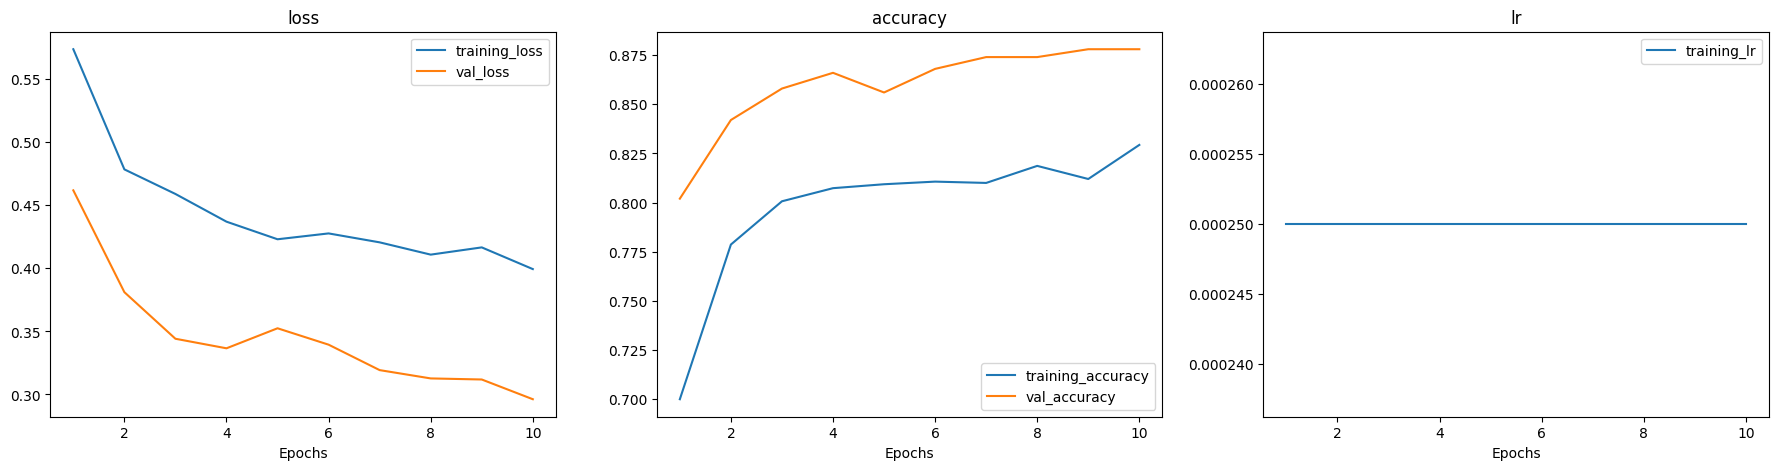

In [96]:
model = CNN_Model(CFG).process(10)

#### Prediction

Found 8 validated image filenames.
1/1 [==============================] - 0s 105ms/step


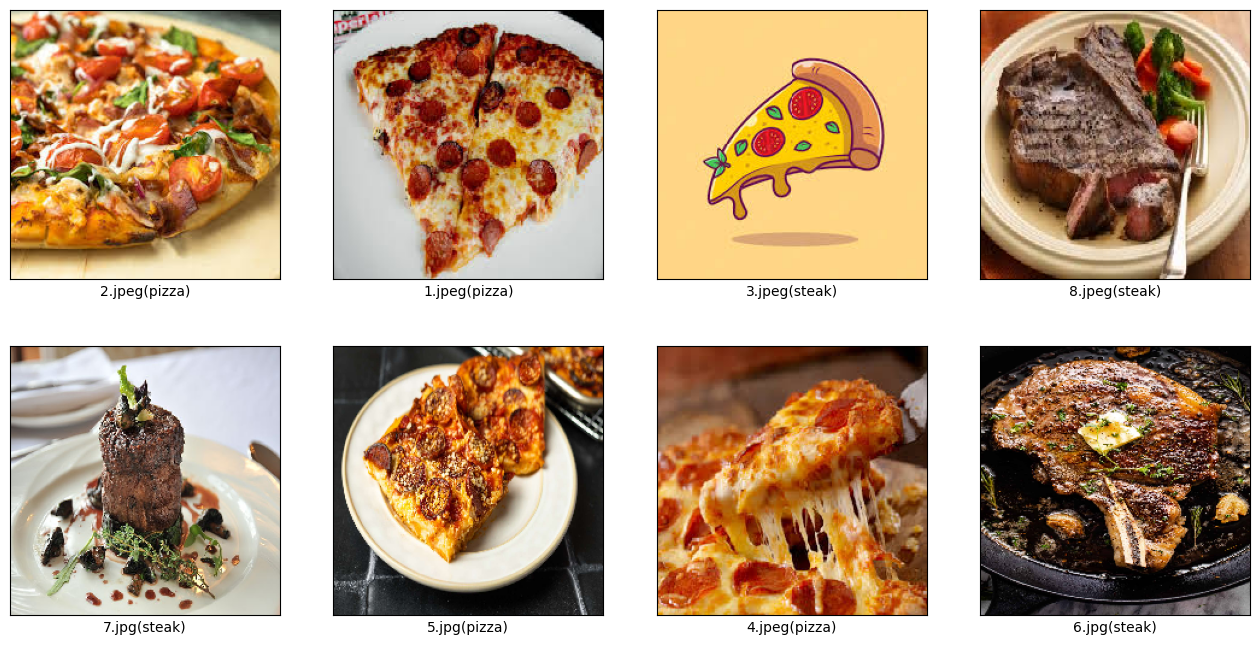

In [10]:
df = model.predict('Datasets/pizza_steak/predict/', max_visualization=8)

1/1 [==============================] - 0s 86ms/step


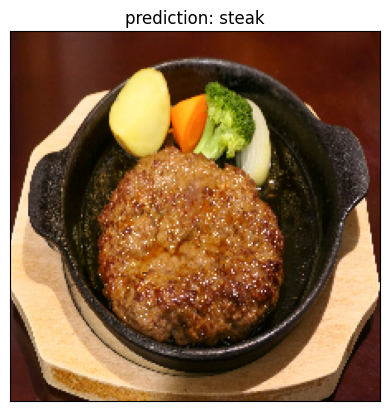

In [28]:
model.predict_from_url(url= 'https://upload.wikimedia.org/wikipedia/commons/e/e0/Hamburg-Steak.jpg')

#### Save/load model

In [99]:
model2 = CNN_Model(CFG, 'models/model_2023_04_28_15_44_30')

Loaded a model in: models/model_2023_04_28_15_44_30


1/1 [==============================] - 0s 68ms/step


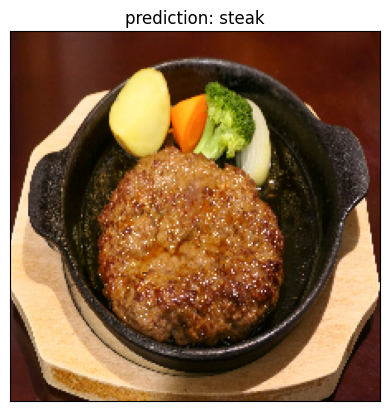

In [100]:
model2.predict_from_url(url= 'https://upload.wikimedia.org/wikipedia/commons/e/e0/Hamburg-Steak.jpg')

## Multi-class 
So sánh với model binary classification thì với model multi-class, cần thay đổi những thứ sau:
- Thay đổi số node tại output layer bằng số class data (number of class)
- Thay đổi hàm activation thành `'softmax'`
- Thay đổi hàm loss thành `'categorical_crossentropy'` thay vì `'binary_crossentropy'`
- Thay đổi datagen `class_mode` thành `'categorical'`
- Thay đổi cách tìm ra prediction label bằng việc sử dụng `argmax`

In [103]:
import os
from datetime import datetime
import pickle
import pandas as pd
from munch import DefaultMunch
from random import choice

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tqdm.keras import TqdmCallback

import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model, img_to_array, load_img

from urllib.request import urlopen
from io import BytesIO

In [105]:
# thực hiện tunning giảm overfitting bằng bổ sung thêm maxpooling và data augmentation
CFG2 = {
   'seed':1 ,
   "data": {
       'dirs':{
            "path": "Datasets/10_food_classes_all_data/",
            'train_subfolder': 'train',
            'test_subfolder': 'test',
            'pred_subfolder': None,           
       },
       'aug_generator':{
            'rescale' : 1/255.,
             'rotation_range' : 20, 
             'shear_range' : 0.2, 
             'zoom_range' : 0.2, 
             'width_shift_range' : 0.1, 
             'height_shift_range': 0.1, 
             'horizontal_flip' : True
       },
       'non_aug_generator':{
            'rescale' : 1/255.,
       },
       'loader':{
           'aug_train' : True,
           'aug_test': False
       },
       'flow':{
           'batch_size' : 32,                   
           'target_size' : (224,224),            
           'class_mode' : 'categorical',
       },
    },
    "model":{
        'build':{
            
        },
        'compile':{
            "optimizer": tf.keras.optimizers.legacy.Adam(),
            'loss':'categorical_crossentropy',
            "metrics": ["accuracy"],
        },
        'fit':{
            'epochs' : 10,
            'verbose' : 0
        },
        'save':{
            'dirs' : 'models',
            'name': 'multiclass_model',
            'export_graph': True,
        }
    },
}



In [102]:
class CNN_Model:
    def __init__(self, config, pathmodel = None ):
        
        self.config = DefaultMunch.fromDict(config)
        tf.random.set_seed(self.config.seed)
        self.epochs = self.config.model.fit.epochs
        self.verbose = self.config.model.fit.verbose
        self.create_datagen()
        if pathmodel is not None:
            self.pathmodel = pathmodel
            self.load_model(pathmodel)
        else:
            self.load_datafolder()
            self.load_data()

    def load_datafolder(self, view = False):
        data_cfg = self.config.data.dirs
        data_folder = data_cfg.path
        self.train_folder = os.path.join(data_folder, data_cfg.train_subfolder)
        self.test_folder = os.path.join(data_folder, data_cfg.test_subfolder)
        self.class_list = [i for i in os.listdir(self.train_folder) if (i[0] != ".") 
                           and os.path.isdir(os.path.join(self.train_folder, i))]
        if view:
            for dirpath, dirnames, filenames in os.walk(data_folder):
                print(f"{dirpath}: {len(dirnames)} directories + {len(filenames)} images")
        
    def create_datagen(self):
        load_cfg = self.config.data
        self.aug_datagen = ImageDataGenerator(**load_cfg.aug_generator)
        self.nonaug_datagen = ImageDataGenerator(**load_cfg.non_aug_generator)
    
    def load_data(self):
        """Loads and Preprocess data """
        load_cfg = self.config.data
        self.train_gen = self.aug_datagen if load_cfg.loader.aug_train else self.nonaug_datagen
        self.test_gen = self.aug_datagen if load_cfg.loader.aug_test else self.nonaug_datagen
        print("train: ", end = "")
        self.train_data = self.train_gen.flow_from_directory(self.train_folder,**load_cfg.flow, shuffle = True)
        print("test: ", end = "")
        self.test_data = self.test_gen.flow_from_directory(self.test_folder,**load_cfg.flow, shuffle = False)
        self.train_len = len(self.train_data)
        self.test_len = len(self.test_data)
        self.class_indices = {v: k for k, v in self.train_data.class_indices.items()}
    
    def load_pred_data(self, pred_dir = None):
        self.pred_dir = self.config.data.dirs.pred_subfolder if pred_dir is None else pred_dir
        if os.path.isdir(self.pred_dir):
            filenames = [i for i in os.listdir(pred_dir) if i[0] != "."]
        elif os.path.isfile(pred_dir):
            filenames = [os.path.basename(pred_dir)]
            self.pred_dir = self.pred_dir[:-len(filenames[0])-1]
        else:
            print('No pred_dir !')
            raise
        flow = {k:v for k,v in self.config.data.flow.items() if k != 'class_mode'}
        df = pd.DataFrame(filenames, columns = ['filename'])
        pred_data = self.nonaug_datagen.flow_from_dataframe(df, directory = self.pred_dir,
                                                shuffle = False, y_col=None, 
                                                class_mode=None, **flow)
        return df, pred_data
            
    def preview_image_generator(self, dataset = 'train', n_aug = 1):
        gen = self.test_gen if dataset == 'test' else self.train_gen
        fol = self.test_folder if dataset == 'test' else self.train_folder
        class_name = choice([i for i  in os.listdir(fol) if i in self.class_list])
        ran_img = choice(os.listdir(os.path.join(fol, class_name)))
        df = pd.DataFrame({"filename":ran_img,"class":class_name}, index = [0])
        flow = {k:v for k,v in self.config.data.flow.items() if k != 'class_mode'}
        data = gen.flow_from_dataframe(df, directory = os.path.join(fol, class_name), **flow)
        imgs = [data.next()[0].squeeze() for i in range(n_aug)]
        self._view(imgs)

    def _view(self, imgs, subtitles = None):
        num = len(imgs)
        rows = (num+3)//4
        cols = 4 if (rows > 1) else min(4, num)
        # plt.figure(figsize=(4*rows, 4*cols))
        plt.figure()
        for i in range(num):
            plt.subplot(rows, cols, i+1)
            plt.imshow(imgs[i])
            plt.yticks([])
            plt.xticks([])
            if subtitles is not None:
                plt.title(subtitles[i])

    def build(self):
        self.model = tf.keras.Sequential()
        self.model.add(Conv2D(10, 3, activation = 'relu',input_shape = (224,224,3)))
        self.model.add(Conv2D(10, 3, activation = 'relu'))
        self.model.add(MaxPool2D(pool_size = (2,2)))
        self.model.add(Conv2D(10, 3, activation = 'relu'))
        self.model.add(Conv2D(10, 3, activation = 'relu'))
        self.model.add(MaxPool2D(pool_size = (2,2)))
        self.model.add(Flatten())
        self.model.add(Dense(10, 'softmax'))

    
    def get_callbacks(self):
        # To prevent over fitting we will stop the learning after 4 epochs and val_loss value not decreased
        earlystop = EarlyStopping(patience=4)
        
        # reduce the learning rate when then accuracy not increase for 2 steps
        learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
        # process bar
        tqdm_probar = TqdmCallback()
        
        # save model checkpoint
        # modelcheck = ModelCheckpoint(filepath, monitor='val_accuracy',mode='max', save_best_only=True)
        
        self.callbacks = [tqdm_probar, learning_rate_reduction, earlystop]

    def train(self, epochs = None):
        if epochs is not None:
            self.epochs = epochs
        model_cfg = self.config.model
        self.get_callbacks()
        self.model.compile(**model_cfg.compile)
        history = self.model.fit(self.train_data, steps_per_epoch=self.train_len,
                                validation_data=self.test_data, validation_steps=self.test_len, 
                               callbacks = self.callbacks, epochs = self.epochs, verbose = self.verbose)
        self.history = history.history

    def evaluate(self):
        train_res = [i for i in self.history.keys() if not i.startswith("val_")]
        valid_res = [i for i in self.history.keys() if i.startswith("val_")]
        epochs = range(1,len(self.history['loss'])+1)
        n = len(train_res)
        plt.figure(figsize = (10*n, 5))
        for i, m in enumerate(train_res):
            plt.subplot(1, n+1, i+1)
            plt.plot(epochs, self.history[m], label='training_'+m)
            if ("val_"+m) in valid_res:
                plt.plot(epochs, self.history["val_"+m], label="val_"+m)
            plt.title(m)
            plt.xlabel('Epochs')
            plt.legend()
            
    def process(self, epochs = None, export = True, modelname = None):
        if modelname is None:
            modelname = self.config.model.save.name
        self.build()
        self.train(epochs)
        self.evaluate()
        if export:
            self.save_model(modelname)
        return self
    
    def summary(self, plot = False):
        if plot:
            return plot_model(self.model, show_shapes=True)
        else:
            return self.model.summary()
    
    def _load_image_from_url(self, url):
        with urlopen(url) as url:
            img = load_img(BytesIO(url.read()), target_size=self.config.data.flow.target_size)
        return tf.expand_dims(img_to_array(img), axis = 0)
    
    # @tf.function
    def predict_from_url(self, url):
        try:
            data = self._load_image_from_url(url)
            gen = self.nonaug_datagen.flow(data)
            pred = float(self.model.predict(gen, steps = 1).argmax().squeeze())
            pred_label = self.class_indices[pred]
            title = "prediction: {}".format(pred_label)
            self._view(gen.next(), [title])
        except:
            print('Error to load url, try another !')
    
    
    def predict(self, pred_dir = None, max_visualization = 4):
        df, pred_data = self.load_pred_data(pred_dir)
        preds = self.model.predict(pred_data, steps = len(pred_data)).argmax()
        df['prediction'] = preds
        df['prediction_label'] = df['prediction'].round().replace(self.class_indices)
        if max_visualization > 0:
            rows = (max_visualization+3)//4
            plt.figure(figsize=(16, 4*rows))
            df_sample = df.sample(n = max_visualization)
            for index, (_, row) in enumerate(df_sample.iterrows()):
                filename = row['filename']
                category = row['prediction_label']
                img = load_img(self.pred_dir + "/" + filename, target_size=(224,224))
                plt.subplot(rows, 4, index+1)
                plt.imshow(img)
                plt.yticks([])
                plt.xticks([])
                plt.xlabel(filename + '(prediction: {})'.format(category) )
                
        return df

    def save_model(self, name = 'model', graph = True, history = True):
        save_cfg = self.config.model.save
        timesr = datetime.now().strftime("_%Y_%m_%d_%H_%M_%S")
        path = os.path.join(save_cfg.dirs, name + timesr)
        self.model.save(path)
        with open(path + '/class_indices.pkl', 'wb') as file_pi:
            pickle.dump(self.class_indices, file_pi)
        if graph:
            plot_model(self.model, to_file = path + '/model_architecture.png', show_shapes=True)
        if history:
            with open(path + '/history.pkl', 'wb') as file_pi:
                pickle.dump(self.history, file_pi)
        print('Model has saved in: ' + path)
    
    def load_model(self, filepath):
        self.model = tf.keras.models.load_model(filepath)
        with open(filepath + '/class_indices.pkl', "rb") as file_pi:
            self.class_indices = pickle.load(file_pi)
        if "history.pkl" in os.listdir(filepath):
            with open(filepath + '/history.pkl', "rb") as file_pi:
                self.history = pickle.load(file_pi)
        print("Loaded a model in: " + filepath)
    
    def distributed_train(self):
        """train with multi-GPU and clusters"""
        mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
        with mirrored_strategy.scope():
            self.model = tf.keras.Model(inputs=inputs, outputs=x)
            self.model.compile(...)
            self.model.fit(...)


        os.environ["TF_CONFIG"] = json.dumps(
            {
                "cluster":{
                    "worker": ["host1:port", "host2:port", "host3:port"]
                },
                "task":{
                     "type": "worker",
                     "index": 1
                }
            }
        )

        multi_worker_mirrored_strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()
        with multi_worker_mirrored_strategy.scope():
            self.model = tf.keras.Model(inputs=inputs, outputs=x)
            self.model.compile(...)
            self.model.fit(...)

        parameter_server_strategy = tf.distribute.experimental.ParameterServerStrategy()

        os.environ["TF_CONFIG"] = json.dumps(
            {
                "cluster": {
                    "worker": ["host1:port", "host2:port", "host3:port"],
                    "ps":  ["host4:port", "host5:port"]
                },
                "task": {
                    "type": "worker",
                    "index": 1
                }
            }
        )

train: Found 5860 images belonging to 10 classes.
test: Found 2500 images belonging to 10 classes.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

INFO:tensorflow:Assets written to: models/multiclass_model_2023_04_28_17_04_05/assets


INFO:tensorflow:Assets written to: models/multiclass_model_2023_04_28_17_04_05/assets


Model has saved in: models/multiclass_model_2023_04_28_17_04_05


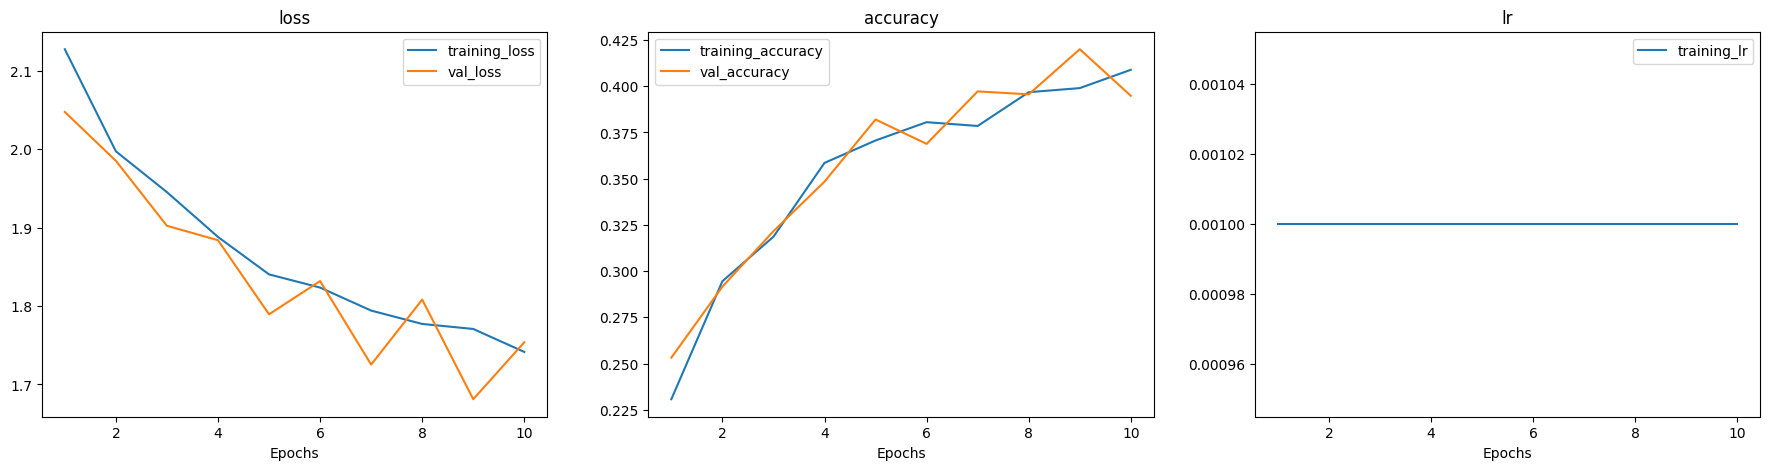

In [106]:
multiclass = CNN_Model(CFG2).process()

In [115]:
multiclass.load_datafolder(True)

Datasets/10_food_classes_all_data/: 2 directories + 0 images
Datasets/10_food_classes_all_data/test: 10 directories + 0 images
Datasets/10_food_classes_all_data/test/ice_cream: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/chicken_curry: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/steak: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/sushi: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/chicken_wings: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/grilled_salmon: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/hamburger: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/pizza: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/ramen: 0 directories + 250 images
Datasets/10_food_classes_all_data/test/fried_rice: 0 directories + 250 images
Datasets/10_food_classes_all_data/train: 10 directories + 0 images
Datasets/10_food_classes_all_data/trai

In [116]:
multiclass.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_49 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_51 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

1/1 [==============================] - 0s 24ms/step


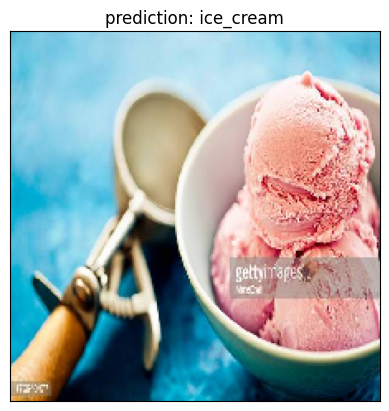

In [111]:
url = 'https://media.gettyimages.com/id/170940477/photo/ice-cream.jpg?s=612x612&w=gi&k=20&c=5Xb4b9Y5pJzyQuh1ER-0-BO51GR8kcBwuokqRkTYWpM='
multiclass.predict_from_url(url)